In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings 
warnings.filterwarnings('ignore')

In [123]:
df=pd.read_csv('Horses.csv')
pd.pandas.set_option('display.max_columns',None)

## APPROACH-0: GENERAL APPROACH

In [124]:
print(df.HorseID.value_counts())
print(df.HorseID.nunique())
print(df.duplicated().sum())

# cdf={'c1':[1,1,1,1],
# 'c2':[2,2,2,2],
# 'c3':[3,3,5,6]}

# cdf=pd.DataFrame(cdf)
# cdf


2749288    35
2946950    31
2954422    28
2928355    27
2950009    27
           ..
2893143     1
2913802     1
2973176     1
3012058     1
2826236     1
Name: HorseID, Length: 6064, dtype: int64
6064
0


In [125]:
df.shape

(36819, 46)

In [126]:
df.head(20)

,RaceID,HorseID,Cloth,Stall,WeightValue,JockeyID,AllowanceValue,OverweightValue,TrainerID,OwnerID,LastRunDaysFlat,Age,Blinkers,Hood,Visor,EyeShield,Eyecover,TongueStrap,CheekPieces,ForecastPrice,StatCourse,StatDistance,StatCourseDistance,StartingPrice,Bred,DamID,SireID,DamSireID,Sex,Colour,YearBorn,MeetingID,RaceNumber,ScheduledTime,HorseCount,Runners,Going,Weather,Course_Distance,RaceType,TrackType,Handicap,eligibility,CourseID,MeetingDate,Won
0,989418,2963489,7,5.0,132,1398052.0,NaN,NaN,1198534,1289143.0,26.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16-Jan,NaN,NaN,NaN,12-Jan,SAF,2803520.0,2004880.0,2179351.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
1,989418,2972665,13,6.0,132,1165412.0,NaN,NaN,1188128,1140080.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20-Jan,NaN,NaN,NaN,40/1,SAF,2749301.0,2960049.0,2001540.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
2,989418,2972662,9,7.0,132,1239852.0,NaN,NaN,1199122,1448576.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10-Jan,NaN,NaN,NaN,NaN,SAF,2761722.0,2441786.0,2123459.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
3,989418,2960365,1,12.0,132,1417524.0,NaN,NaN,1049637,1487690.0,33.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07-Apr,NaN,NaN,NaN,11-Oct,SAF,2347111.0,2170013.0,2071137.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,1
4,989418,2968596,11,8.0,132,1354773.0,NaN,NaN,1140041,1403676.0,24.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08-Jan,NaN,NaN,NaN,NaN,SAF,2618721.0,2410998.0,2170115.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
5,989418,2972658,2,3.0,132,1362975.0,NaN,NaN,1188086,1288704.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16-Jan,NaN,NaN,NaN,28-Jan,SAF,2618903.0,2320735.0,2352644.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
6,989418,2972664,12,9.0,132,1140054.0,NaN,NaN,1198584,1490708.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20-Jan,NaN,NaN,NaN,33/1,SAF,2718050.0,2950716.0,2170153.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
7,989418,2972663,10,1.0,132,1389064.0,NaN,NaN,1143892,1439626.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16-Jan,NaN,NaN,NaN,50/1,SAF,2884990.0,2908964.0,2170068.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
8,989418,2972659,3,13.0,132,1418973.0,3.0,NaN,1165844,1167965.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14-Jan,NaN,NaN,NaN,16-Jan,SAF,2619919.0,2231546.0,2172473.0,f,ch,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
9,989418,2965595,4,11.0,132,1138258.0,NaN,NaN,1140038,1143873.0,45.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03-Jan,NaN,NaN,NaN,11-Aug,SAF,2814419.0,2327160.0,2198389.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0


In [127]:
df['Won'].value_counts()

0    33912
1     2907
Name: Won, dtype: int64

In [128]:
df_cpy=df.copy()

In [129]:
df_cpy.columns

Index(['RaceID', 'HorseID', 'Cloth', 'Stall', 'WeightValue', 'JockeyID',
       'AllowanceValue', 'OverweightValue', 'TrainerID', 'OwnerID',
       'LastRunDaysFlat', 'Age', 'Blinkers', 'Hood', 'Visor', 'EyeShield',
       'Eyecover', 'TongueStrap', 'CheekPieces', 'ForecastPrice', 'StatCourse',
       'StatDistance', 'StatCourseDistance', 'StartingPrice', 'Bred', 'DamID',
       'SireID', 'DamSireID', 'Sex', 'Colour', 'YearBorn', 'MeetingID',
       'RaceNumber', 'ScheduledTime', 'HorseCount', 'Runners', 'Going',
       'Weather', 'Course_Distance', 'RaceType', 'TrackType', 'Handicap',
       'eligibility', 'CourseID', 'MeetingDate', 'Won'],
      dtype='object')

In [130]:
df_cpy.head(20)

,RaceID,HorseID,Cloth,Stall,WeightValue,JockeyID,AllowanceValue,OverweightValue,TrainerID,OwnerID,LastRunDaysFlat,Age,Blinkers,Hood,Visor,EyeShield,Eyecover,TongueStrap,CheekPieces,ForecastPrice,StatCourse,StatDistance,StatCourseDistance,StartingPrice,Bred,DamID,SireID,DamSireID,Sex,Colour,YearBorn,MeetingID,RaceNumber,ScheduledTime,HorseCount,Runners,Going,Weather,Course_Distance,RaceType,TrackType,Handicap,eligibility,CourseID,MeetingDate,Won
0,989418,2963489,7,5.0,132,1398052.0,NaN,NaN,1198534,1289143.0,26.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16-Jan,NaN,NaN,NaN,12-Jan,SAF,2803520.0,2004880.0,2179351.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
1,989418,2972665,13,6.0,132,1165412.0,NaN,NaN,1188128,1140080.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20-Jan,NaN,NaN,NaN,40/1,SAF,2749301.0,2960049.0,2001540.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
2,989418,2972662,9,7.0,132,1239852.0,NaN,NaN,1199122,1448576.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10-Jan,NaN,NaN,NaN,NaN,SAF,2761722.0,2441786.0,2123459.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
3,989418,2960365,1,12.0,132,1417524.0,NaN,NaN,1049637,1487690.0,33.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07-Apr,NaN,NaN,NaN,11-Oct,SAF,2347111.0,2170013.0,2071137.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,1
4,989418,2968596,11,8.0,132,1354773.0,NaN,NaN,1140041,1403676.0,24.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08-Jan,NaN,NaN,NaN,NaN,SAF,2618721.0,2410998.0,2170115.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
5,989418,2972658,2,3.0,132,1362975.0,NaN,NaN,1188086,1288704.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16-Jan,NaN,NaN,NaN,28-Jan,SAF,2618903.0,2320735.0,2352644.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
6,989418,2972664,12,9.0,132,1140054.0,NaN,NaN,1198584,1490708.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20-Jan,NaN,NaN,NaN,33/1,SAF,2718050.0,2950716.0,2170153.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
7,989418,2972663,10,1.0,132,1389064.0,NaN,NaN,1143892,1439626.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16-Jan,NaN,NaN,NaN,50/1,SAF,2884990.0,2908964.0,2170068.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
8,989418,2972659,3,13.0,132,1418973.0,3.0,NaN,1165844,1167965.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14-Jan,NaN,NaN,NaN,16-Jan,SAF,2619919.0,2231546.0,2172473.0,f,ch,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
9,989418,2965595,4,11.0,132,1138258.0,NaN,NaN,1140038,1143873.0,45.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03-Jan,NaN,NaN,NaN,11-Aug,SAF,2814419.0,2327160.0,2198389.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0


### MISSING VLAUE IMPUTATION

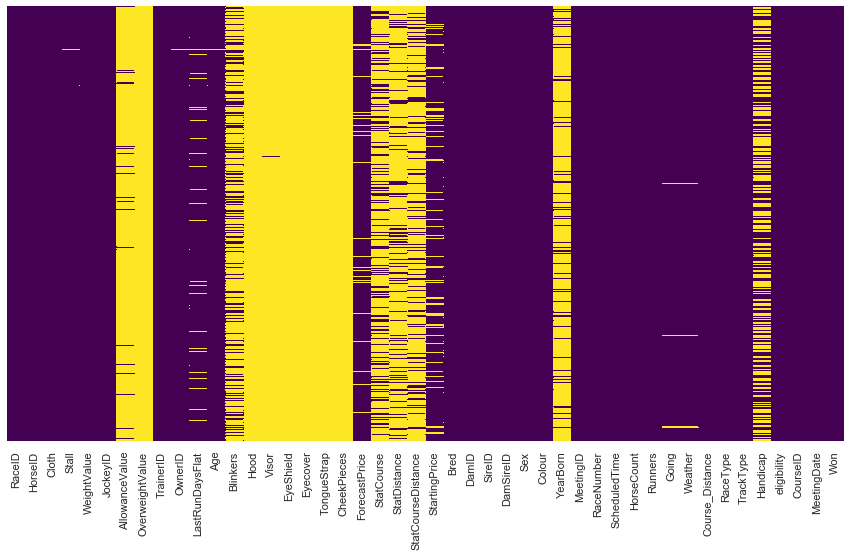

In [131]:
plt.figure(figsize=(15,8))
sb.heatmap(df_cpy.isnull(),yticklabels=False,cmap='viridis',cbar=False)
plt.show()

In [132]:
for f in df_cpy.columns:
    print(f,' :',round(df_cpy[f].isnull().sum()/len(df_cpy),2)*100,' % missing values')

RaceID  : 0.0  % missing values
HorseID  : 0.0  % missing values
Cloth  : 0.0  % missing values
Stall  : 1.0  % missing values
WeightValue  : 0.0  % missing values
JockeyID  : 0.0  % missing values
AllowanceValue  : 96.0  % missing values
OverweightValue  : 100.0  % missing values
TrainerID  : 0.0  % missing values
OwnerID  : 1.0  % missing values
LastRunDaysFlat  : 7.000000000000001  % missing values
Age  : 1.0  % missing values
Blinkers  : 72.0  % missing values
Hood  : 100.0  % missing values
Visor  : 100.0  % missing values
EyeShield  : 100.0  % missing values
Eyecover  : 100.0  % missing values
TongueStrap  : 100.0  % missing values
CheekPieces  : 100.0  % missing values
ForecastPrice  : 5.0  % missing values
StatCourse  : 76.0  % missing values
StatDistance  : 81.0  % missing values
StatCourseDistance  : 80.0  % missing values
StartingPrice  : 13.0  % missing values
Bred  : 0.0  % missing values
DamID  : 0.0  % missing values
SireID  : 0.0  % missing values
DamSireID  : 0.0  % mi

In [133]:
x=round(df_cpy.isnull().sum()/len(df_cpy),2)*100
cols_toDel=df_cpy.columns[x>95].tolist()
cols_toDel

['AllowanceValue',
 'OverweightValue',
 'Hood',
 'Visor',
 'EyeShield',
 'Eyecover',
 'TongueStrap',
 'CheekPieces']

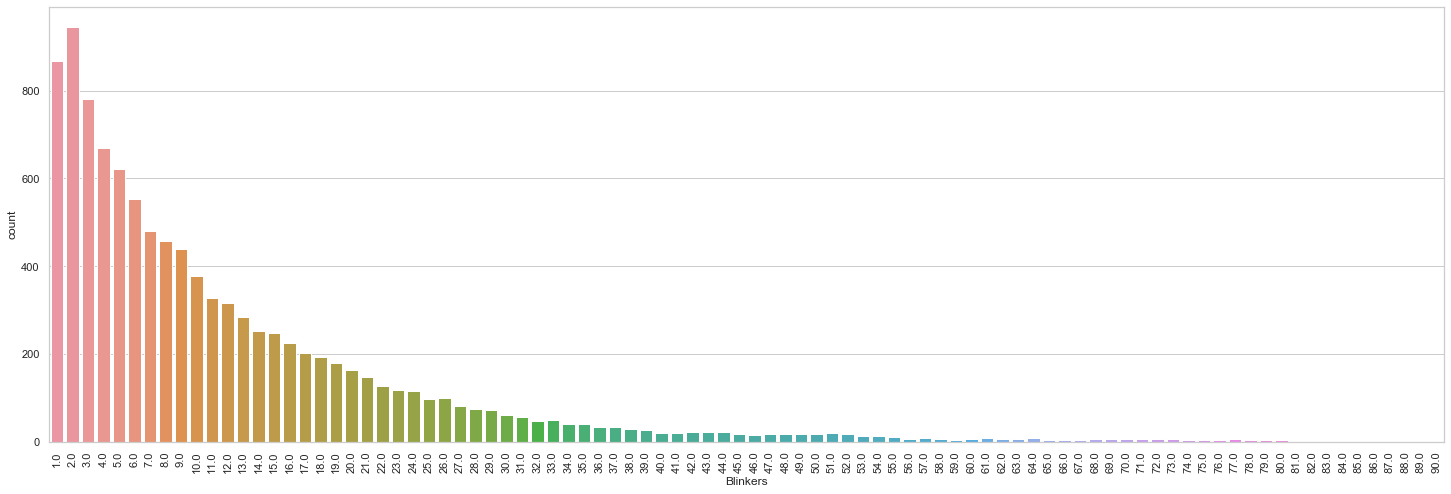

In [134]:
df_cpy.Blinkers.value_counts()

sb.set(style='whitegrid',palette='rainbow')
plt.figure(figsize=(25,8))
sb.countplot(df_cpy.Blinkers)
plt.xticks(rotation=90)
plt.show()

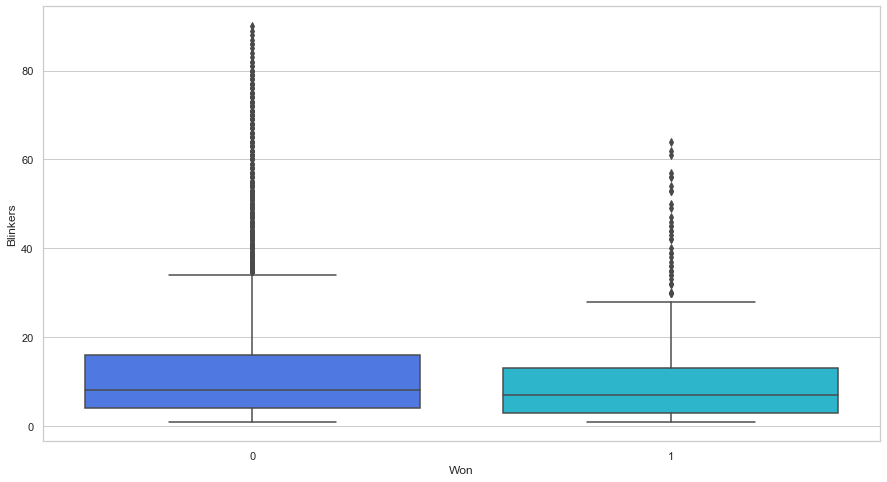

In [16]:
sb.set(style='whitegrid',palette='rainbow')
plt.figure(figsize=(15,8))
sb.boxplot(y=df_cpy['Blinkers'],x=df_cpy['Won'])
plt.show()

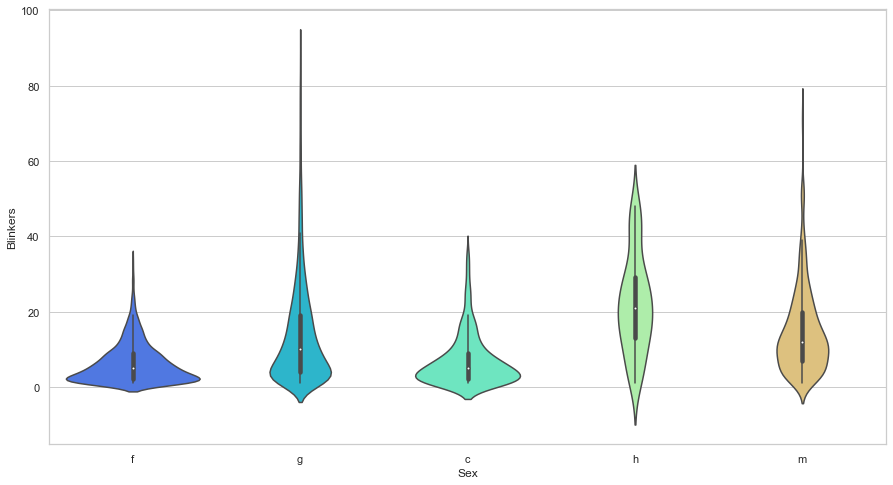

In [17]:
sb.set(style='whitegrid',palette='rainbow')
plt.figure(figsize=(15,8))
sb.violinplot(y='Blinkers',x='Sex',data=df_cpy)
plt.show()

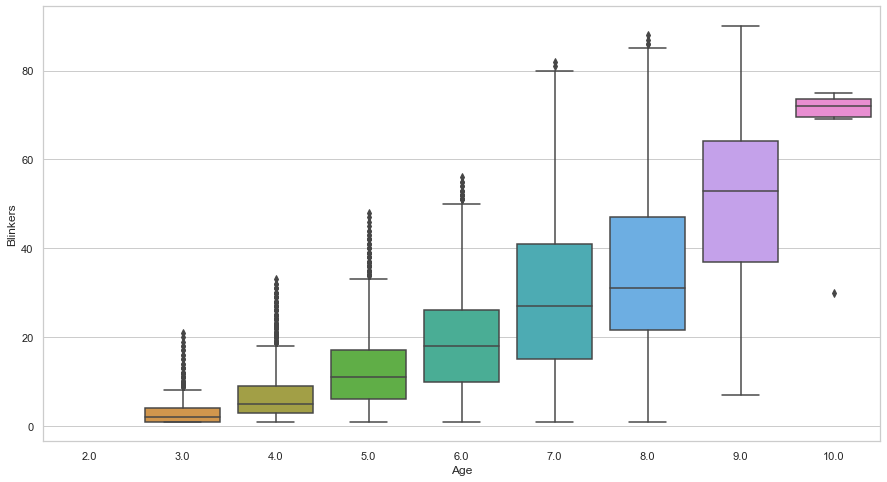

In [18]:
sb.set(style='whitegrid',palette='rainbow')
plt.figure(figsize=(15,8))
sb.boxplot(y='Blinkers',x='Age',data=df_cpy)
plt.show()

In [135]:
df_new=df[['Blinkers','Age']]
df_new2=df_new.dropna(axis=0)
blinkers=df_new2.iloc[:,0]
age=df_new2.iloc[:,1]

In [136]:
age_2=np.median(blinkers[age==2])
age_3=np.median(blinkers[age==3])
age_4=np.median(blinkers[age==4])
age_5=np.median(blinkers[age==5])
age_6=np.median(blinkers[age==6])
age_7=np.median(blinkers[age==7])
age_8=np.median(blinkers[age==8])
age_9=np.median(blinkers[age==9])
age_10=np.median(blinkers[age==10])

def impute_blinkers(cols):
    
    blinkers=cols[0]
    age=cols[1]
    
    if pd.isnull(blinkers):
        
        if age==3:
            return age_3
       
        elif age==4:
            return age_4
        elif age==5:
            return age_5
        elif age==6:
            return age_6
        elif age==7:
            return age_7
        elif age==8:
            return age_8
        elif age==9:
            return age_9
        else:
            return age_10
    else:
        return blinkers


In [137]:
df_cpy['Blinkers']=df_cpy[['Blinkers','Age']].apply(impute_blinkers,axis=1)
df_cpy.head()

,RaceID,HorseID,Cloth,Stall,WeightValue,JockeyID,AllowanceValue,OverweightValue,TrainerID,OwnerID,LastRunDaysFlat,Age,Blinkers,Hood,Visor,EyeShield,Eyecover,TongueStrap,CheekPieces,ForecastPrice,StatCourse,StatDistance,StatCourseDistance,StartingPrice,Bred,DamID,SireID,DamSireID,Sex,Colour,YearBorn,MeetingID,RaceNumber,ScheduledTime,HorseCount,Runners,Going,Weather,Course_Distance,RaceType,TrackType,Handicap,eligibility,CourseID,MeetingDate,Won
0,989418,2963489,7,5.0,132,1398052.0,NaN,NaN,1198534,1289143.0,26.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,16-Jan,NaN,NaN,NaN,12-Jan,SAF,2803520.0,2004880.0,2179351.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
1,989418,2972665,13,6.0,132,1165412.0,NaN,NaN,1188128,1140080.0,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,20-Jan,NaN,NaN,NaN,40/1,SAF,2749301.0,2960049.0,2001540.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
2,989418,2972662,9,7.0,132,1239852.0,NaN,NaN,1199122,1448576.0,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,10-Jan,NaN,NaN,NaN,NaN,SAF,2761722.0,2441786.0,2123459.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
3,989418,2960365,1,12.0,132,1417524.0,NaN,NaN,1049637,1487690.0,33.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,07-Apr,NaN,NaN,NaN,11-Oct,SAF,2347111.0,2170013.0,2071137.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,1
4,989418,2968596,11,8.0,132,1354773.0,NaN,NaN,1140041,1403676.0,24.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,08-Jan,NaN,NaN,NaN,NaN,SAF,2618721.0,2410998.0,2170115.0,f,b,NaN,87048,1,##########,13,11.0,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0


In [138]:
df_cpy['LastRunDaysFlat'].fillna(value=df_cpy['LastRunDaysFlat'].median(),inplace=True)
df_cpy['StatCourse'].fillna(value=df_cpy['StatCourse'].mode()[0],inplace=True)
df_cpy['StatCourseDistance'].fillna(value=df_cpy['StatCourseDistance'].mode()[0],inplace=True)
df_cpy['StatDistance'].fillna(value=df_cpy['StatDistance'].mode()[0],inplace=True)
df_cpy['Age'].fillna(value=df_cpy['Age'].mode()[0],inplace=True)
df_cpy['Stall'].fillna(value=df_cpy['Stall'].median(),inplace=True)
df_cpy['Going'].fillna(value=df_cpy['Going'].mode()[0],inplace=True)
df_cpy['Weather'].fillna(value=df_cpy['Weather'].mode()[0],inplace=True)
df_cpy['TrackType'].fillna(value=df_cpy['TrackType'].mode()[0],inplace=True)
df_cpy['eligibility'].fillna(value=df_cpy['eligibility'].mode()[0],inplace=True)
df_cpy['Handicap'].fillna(value=df_cpy['Handicap'].mode()[0],inplace=True)
df_cpy['OwnerID'].fillna(value=df_cpy['OwnerID'].mode()[0],inplace=True)
df_cpy.StartingPrice.fillna(value=df_cpy.StartingPrice.mode()[0],inplace=True)
df_cpy.ForecastPrice.fillna(value=df_cpy.ForecastPrice.mode()[0],inplace=True)

df_cpy.StartingPrice[df_cpy.StartingPrice.str.contains('/1')]=df_cpy.StartingPrice.mode()[0]
df_cpy.ForecastPrice[df_cpy.ForecastPrice.str.contains('/1')]=df_cpy.ForecastPrice.mode()[0]

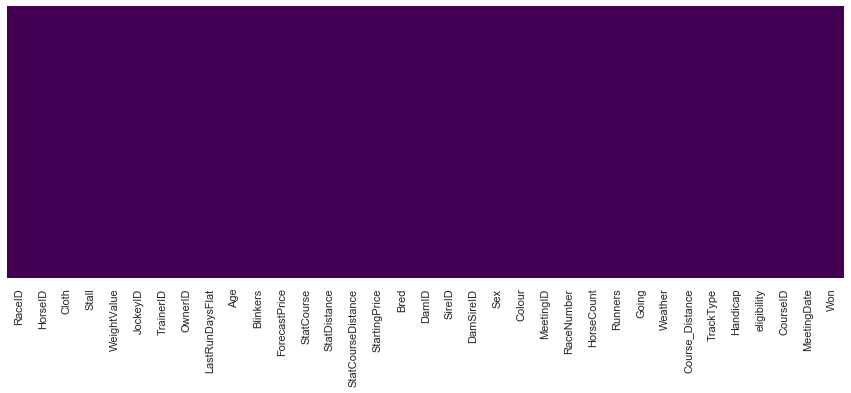

In [142]:
plt.figure(figsize=(15,5))
sb.heatmap(df_cpy.isnull(),cbar=False,yticklabels=False,cmap='viridis')
plt.show()

#### RaceType: It's the same for all the observastions
#### ScheduledTime: This variable has no information
#### YearBorn: We already have 'Age' so Year born might not be needed

In [140]:
cols_toDel=cols_toDel+['RaceType','ScheduledTime','YearBorn']
print('cols_toDel:\n',cols_toDel,'\n','*'*50)
df_cpy.drop(cols_toDel,axis=1,inplace=True)
print('new dimmensions:',df_cpy.shape,'\n','*'*50)
df_cpy.head(8)

cols_toDel:
 ['AllowanceValue', 'OverweightValue', 'Hood', 'Visor', 'EyeShield', 'Eyecover', 'TongueStrap', 'CheekPieces', 'RaceType', 'ScheduledTime', 'YearBorn'] 
 **************************************************
new dimmensions: (36819, 35) 
 **************************************************


,RaceID,HorseID,Cloth,Stall,WeightValue,JockeyID,TrainerID,OwnerID,LastRunDaysFlat,Age,Blinkers,ForecastPrice,StatCourse,StatDistance,StatCourseDistance,StartingPrice,Bred,DamID,SireID,DamSireID,Sex,Colour,MeetingID,RaceNumber,HorseCount,Runners,Going,Weather,Course_Distance,TrackType,Handicap,eligibility,CourseID,MeetingDate,Won
0,989418,2963489,7,5.0,132,1398052.0,1198534,1289143.0,26.0,3.0,2.0,16-Jan,1.0,1.0,1.0,12-Jan,SAF,2803520.0,2004880.0,2179351.0,f,b,87048,1,13,11.0,Good,Cloudy,1312,Turf,1.0,2YO only,380,02/05/2017,0
1,989418,2972665,13,6.0,132,1165412.0,1188128,1140080.0,25.0,3.0,2.0,20-Jan,1.0,1.0,1.0,14-Jan,SAF,2749301.0,2960049.0,2001540.0,f,b,87048,1,13,11.0,Good,Cloudy,1312,Turf,1.0,2YO only,380,02/05/2017,0
2,989418,2972662,9,7.0,132,1239852.0,1199122,1448576.0,25.0,3.0,2.0,10-Jan,1.0,1.0,1.0,14-Jan,SAF,2761722.0,2441786.0,2123459.0,f,b,87048,1,13,11.0,Good,Cloudy,1312,Turf,1.0,2YO only,380,02/05/2017,0
3,989418,2960365,1,12.0,132,1417524.0,1049637,1487690.0,33.0,3.0,2.0,07-Apr,1.0,1.0,1.0,11-Oct,SAF,2347111.0,2170013.0,2071137.0,f,b,87048,1,13,11.0,Good,Cloudy,1312,Turf,1.0,2YO only,380,02/05/2017,1
4,989418,2968596,11,8.0,132,1354773.0,1140041,1403676.0,24.0,3.0,2.0,08-Jan,1.0,1.0,1.0,14-Jan,SAF,2618721.0,2410998.0,2170115.0,f,b,87048,1,13,11.0,Good,Cloudy,1312,Turf,1.0,2YO only,380,02/05/2017,0
5,989418,2972658,2,3.0,132,1362975.0,1188086,1288704.0,25.0,3.0,2.0,16-Jan,1.0,1.0,1.0,28-Jan,SAF,2618903.0,2320735.0,2352644.0,f,b,87048,1,13,11.0,Good,Cloudy,1312,Turf,1.0,2YO only,380,02/05/2017,0
6,989418,2972664,12,9.0,132,1140054.0,1198584,1490708.0,25.0,3.0,2.0,20-Jan,1.0,1.0,1.0,14-Jan,SAF,2718050.0,2950716.0,2170153.0,f,b,87048,1,13,11.0,Good,Cloudy,1312,Turf,1.0,2YO only,380,02/05/2017,0
7,989418,2972663,10,1.0,132,1389064.0,1143892,1439626.0,25.0,3.0,2.0,16-Jan,1.0,1.0,1.0,14-Jan,SAF,2884990.0,2908964.0,2170068.0,f,b,87048,1,13,11.0,Good,Cloudy,1312,Turf,1.0,2YO only,380,02/05/2017,0


In [141]:
df_cpy.isnull().sum()

RaceID                 0
HorseID                0
Cloth                  0
Stall                  0
WeightValue            0
JockeyID               1
TrainerID              0
OwnerID                0
LastRunDaysFlat        0
Age                    0
Blinkers               0
ForecastPrice          0
StatCourse             0
StatDistance           0
StatCourseDistance     0
StartingPrice          0
Bred                   0
DamID                  5
SireID                 5
DamSireID              5
Sex                    5
Colour                 5
MeetingID              0
RaceNumber             0
HorseCount             0
Runners               20
Going                  0
Weather                0
Course_Distance        0
TrackType              0
Handicap               0
eligibility            0
CourseID               0
MeetingDate            0
Won                    0
dtype: int64

In [ ]:
df_cpy.to_csv('Horses_Approach0_1.csv',index=False)
#this is the first approach-step 1

In [28]:
top5_ow=[x for x in df_cpy['OwnerID'].value_counts(ascending=False).head(5).index]
top5_jo=[x for x in df_cpy['JockeyID'].value_counts(ascending=False).head(5).index]
top5_tr=[x for x in df_cpy['TrainerID'].value_counts(ascending=False).head(5).index]
top5_dm=[x for x in df_cpy['DamID'].value_counts(ascending=False).head(5).index]
top5_si=[x for x in df_cpy['SireID'].value_counts(ascending=False).head(5).index]
top5_ds=[x for x in df_cpy['DamSireID'].value_counts(ascending=False).head(5).index]

df_cpy['OwnerID']=[lev if lev in top5_ow else 'other' for lev in df_cpy.OwnerID]

df_cpy['JockeyID']=[lev if lev in top5_jo else 'other' for lev in df_cpy.JockeyID]

df_cpy['TrainerID']=[lev if lev in top5_tr else 'other' for lev in df_cpy.TrainerID]

df_cpy['DamID']=[lev if lev in top5_dm else 'other' for lev in df_cpy.DamID]

df_cpy['SireID']=[lev if lev in top5_si else 'other' for lev in df_cpy.SireID]

df_cpy['DamSireID']=[lev if lev in top5_ds else 'other' for lev in df_cpy.DamSireID]

other        33668
1478935.0     1309
1167965.0      509
1079305.0      493
1376731.0      427
1073500.0      413
Name: OwnerID, dtype: int64

In [42]:
del df_cpy_final
from sklearn.preprocessing import LabelEncoder
to_dummies=['Bred','Sex','Colour','TrackType','Weather','Going','eligibility','OwnerID','JockeyID','TrainerID','DamID','SireID','DamSireID']
horse_dummies=pd.get_dummies(df_cpy[to_dummies],drop_first=True)
df_cpy_final=pd.concat([df_cpy.drop(to_dummies+['HorseID','RaceID','CourseID'],axis=1),horse_dummies],axis=1)

le_foreprice=LabelEncoder()
le_startprice=LabelEncoder()
le_meetdate=LabelEncoder()
le_meetid=LabelEncoder()
# le_owid=LabelEncoder()
# le_joid=LabelEncoder()
# le_trid=LabelEncoder()
# le_dmid=LabelEncoder()
# le_siid=LabelEncoder()
# le_dmsiid=LabelEncoder()

df_cpy_final.ForecastPrice=le_foreprice.fit_transform(df_cpy_final.ForecastPrice)
df_cpy_final.StartingPrice=le_startprice.fit_transform(df_cpy_final.StartingPrice)
df_cpy_final.MeetingDate=le_meetdate.fit_transform(df_cpy_final.MeetingDate)
df_cpy_final.MeetingID=le_meetid.fit_transform(df_cpy_final.MeetingID)

# df_cpy_final.OwnerID=le_owid.fit_transform(df_cpy_final.OwnerID)
# df_cpy_final.JockeyID=le_joid.fit_transform(df_cpy_final.JockeyID)
# df_cpy_final.TrainerID=le_trid.fit_transform(f_cpy_final.TrainerID)
# df_cpy_final.DamID=le_dmid.fit_transform(df_cpy_final.DamID)
# df_cpy_final.SireID=le_siid.fit_transform(df_cpy_final.SireID)
# df_cpy_final.DamSireID=le_dmsiid.fit_transform(df_cpy_final.DamSireID)

In [43]:
df_cpy_final.head(20)

,Cloth,Stall,WeightValue,LastRunDaysFlat,Age,Blinkers,ForecastPrice,StatCourse,StatDistance,StatCourseDistance,StartingPrice,MeetingID,RaceNumber,HorseCount,Runners,Course_Distance,Handicap,MeetingDate,Won,Bred_AUS,Bred_AUT,Bred_BRZ,Bred_FR,Bred_GB,Bred_GER,Bred_IND,Bred_IRE,Bred_NZ,Bred_SAF,Bred_USA,Bred_ZIM,Sex_f,Sex_g,Sex_h,Sex_m,Colour_b/b,Colour_bl/,Colour_br,Colour_ch,Colour_dkb,Colour_g,Colour_gr,Colour_gr/,TrackType_Sand,TrackType_Turf,Weather_Fine,Weather_Fine & Sunny,Weather_Fine but Cloudy,Weather_Overcast,Weather_Raining,Weather_Sunny,Weather_Sunny & Warm,Weather_Sunny & Windy,Weather_Sunny Intervals,Weather_Unsettled,Going_Good to Firm,Going_Good to Soft,Going_Heavy,Going_Soft,Going_Soft (Heavy in places),Going_Standard,eligibility_2YO plus,eligibility_3YO only,eligibility_3YO plus,eligibility_4YO plus,OwnerID_1079305.0,OwnerID_1167965.0,OwnerID_1376731.0,OwnerID_1478935.0,OwnerID_other,JockeyID_1239852.0,JockeyID_1384815.0,JockeyID_1398052.0,JockeyID_1409974.0,JockeyID_other,TrainerID_1140076,TrainerID_1165287,TrainerID_1165325,TrainerID_1478919,TrainerID_other,DamID_2618814.0,DamID_2618962.0,DamID_2621091.0,DamID_2651060.0,DamID_other,SireID_2167985.0,SireID_2170013.0,SireID_2352771.0,SireID_2411624.0,SireID_other,DamSireID_2005847.0,DamSireID_2123459.0,DamSireID_2170021.0,DamSireID_2264809.0,DamSireID_other
0,7,5.0,132,26.0,3.0,2.0,42,1.0,1.0,1.0,48,0,1,13,11.0,1312,1.0,11,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,13,6.0,132,25.0,3.0,2.0,45,1.0,1.0,1.0,55,0,1,13,11.0,1312,1.0,11,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,9,7.0,132,25.0,3.0,2.0,29,1.0,1.0,1.0,55,0,1,13,11.0,1312,1.0,11,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
3,1,12.0,132,33.0,3.0,2.0,18,1.0,1.0,1.0,47,0,1,13,11.0,1312,1.0,11,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
4,11,8.0,132,24.0,3.0,2.0,23,1.0,1.0,1.0,55,0,1,13,11.0,1312,1.0,11,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
5,2,3.0,132,25.0,3.0,2.0,42,1.0,1.0,1.0,69,0,1,13,11.0,1312,1.0,11,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
6,12,9.0,132,25.0,3.0,2.0,45,1.0,1.0,1.0,55,0,1,13,11.0,1312,1.0,11,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
7,10,1.0,132,25.0,3.0,2.0,42,1.0,1.0,1.0,55,0,1,13,11.0,1312,1.0,11,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
8,3,13.0,132,25.0,3.0,2.0,39,1.0,1.0,1.0,60,0,1,13,11.0,1312,1.0,11,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
9,4,11.0,132,45.0,3.0,2.0,7,1.0,1.0,1.0,44,0,1,13,11.0,1312,1.0,11,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [44]:
df_cpy_final.to_csv('Horses_Approach0_2.csv',index=False)

## Approach-I: Data Transformation

In [60]:
df_cpy=pd.read_csv('Horses_Approach0_1.csv')

In [61]:
df_cpy.head()

,RaceID,HorseID,Cloth,Stall,WeightValue,JockeyID,TrainerID,OwnerID,LastRunDaysFlat,Age,Blinkers,ForecastPrice,StatCourse,StatDistance,StatCourseDistance,StartingPrice,Bred,DamID,SireID,DamSireID,Sex,Colour,MeetingID,RaceNumber,HorseCount,Runners,Going,Weather,Course_Distance,TrackType,Handicap,eligibility,CourseID,MeetingDate,Won
0,989418,2963489,7,5.0,132,1398052.0,1198534,1289143.0,26.0,3.0,2.0,16-Jan,1.0,1.0,1.0,12-Jan,SAF,2803520.0,2004880.0,2179351.0,f,b,87048,1,13,11.0,Good,Cloudy,1312,Turf,1.0,2YO only,380,02/05/2017,0
1,989418,2972665,13,6.0,132,1165412.0,1188128,1140080.0,25.0,3.0,2.0,20-Jan,1.0,1.0,1.0,14-Jan,SAF,2749301.0,2960049.0,2001540.0,f,b,87048,1,13,11.0,Good,Cloudy,1312,Turf,1.0,2YO only,380,02/05/2017,0
2,989418,2972662,9,7.0,132,1239852.0,1199122,1448576.0,25.0,3.0,2.0,10-Jan,1.0,1.0,1.0,14-Jan,SAF,2761722.0,2441786.0,2123459.0,f,b,87048,1,13,11.0,Good,Cloudy,1312,Turf,1.0,2YO only,380,02/05/2017,0
3,989418,2960365,1,12.0,132,1417524.0,1049637,1487690.0,33.0,3.0,2.0,07-Apr,1.0,1.0,1.0,11-Oct,SAF,2347111.0,2170013.0,2071137.0,f,b,87048,1,13,11.0,Good,Cloudy,1312,Turf,1.0,2YO only,380,02/05/2017,1
4,989418,2968596,11,8.0,132,1354773.0,1140041,1403676.0,24.0,3.0,2.0,08-Jan,1.0,1.0,1.0,14-Jan,SAF,2618721.0,2410998.0,2170115.0,f,b,87048,1,13,11.0,Good,Cloudy,1312,Turf,1.0,2YO only,380,02/05/2017,0


In [47]:
df_cpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36819 entries, 0 to 36818
Data columns (total 35 columns):
RaceID                36819 non-null int64
HorseID               36819 non-null int64
Cloth                 36819 non-null int64
Stall                 36819 non-null float64
WeightValue           36819 non-null int64
JockeyID              36819 non-null object
TrainerID             36819 non-null object
OwnerID               36819 non-null object
LastRunDaysFlat       36819 non-null float64
Age                   36819 non-null float64
Blinkers              36819 non-null float64
ForecastPrice         36819 non-null object
StatCourse            36819 non-null float64
StatDistance          36819 non-null float64
StatCourseDistance    36819 non-null float64
StartingPrice         36819 non-null object
Bred                  36819 non-null object
DamID                 36819 non-null object
SireID                36819 non-null object
DamSireID             36819 non-null object
Sex     

In [63]:
df_cpy.columns

Index(['RaceID', 'HorseID', 'Cloth', 'Stall', 'WeightValue', 'JockeyID',
       'TrainerID', 'OwnerID', 'LastRunDaysFlat', 'Age', 'Blinkers',
       'ForecastPrice', 'StatCourse', 'StatDistance', 'StatCourseDistance',
       'StartingPrice', 'Bred', 'DamID', 'SireID', 'DamSireID', 'Sex',
       'Colour', 'MeetingID', 'RaceNumber', 'HorseCount', 'Runners', 'Going',
       'Weather', 'Course_Distance', 'TrackType', 'Handicap', 'eligibility',
       'CourseID', 'MeetingDate', 'Won'],
      dtype='object')

In [97]:
# df_dict={'RaceID':df_cpy.groupby('HorseID')['RaceID'].count(),
# 'Cloth':df_cpy.groupby('HorseID')['Cloth'].median(),
# 'WeightValue':df_cpy.groupby('HorseID')['WeightValue'].median(),

# 'JockeyID_Num':df_cpy.groupby('HorseID')['JockeyID'].nunique(),
# 'TrainerID_Num':df_cpy.groupby('HorseID')['TrainerID'].nunique(),
# 'OwnerID_Num':df_cpy.groupby('HorseID')['OwnerID'].nunique(),

# 'LastRunDaysFlat':df_cpy.groupby('HorseID')['LastRunDaysFlat'].median(),
# 'Age':df_cpy.groupby('HorseID')['Age'].median(),
# 'Blinkers':df_cpy.groupby('HorseID')['Blinkers'].median(),
# 'StatCourse':df_cpy.groupby('HorseID')['StatCourse'].median(),
# 'StatDistance':df_cpy.groupby('HorseID')['StatDistance'].median(),
# 'StatCourseDistance':df_cpy.groupby('HorseID')['StatCourseDistance'].median(),
# 'Bred':df_cpy.groupby('HorseID')['Bred'].apply(lambda x: x.mode()),
# 'DamID':df_cpy.groupby('HorseID')['DamID'].apply(lambda x: x.mode()),
# 'SireID':df_cpy.groupby('HorseID')['SireID'].apply(lambda x: x.mode()),
# 'DamSireID':df_cpy.groupby('HorseID')['DamSireID'].apply(lambda x: x.mode()),
# 'Sex':df_cpy.groupby('HorseID')['Sex'].apply(lambda x: x.mode()),
# 'Colour':df_cpy.groupby('HorseID')['Colour'].apply(lambda x: x.mode()),

# 'RaceNumber':df_cpy.groupby('HorseID')['RaceNumber'].apply(lambda x: x.mode()),

# 'HorseCount':df_cpy.groupby('HorseID')['HorseCount'].median(),
# 'Runners':df_cpy.groupby('HorseID')['Runners'].median(),
# 'Going':df_cpy.groupby('HorseID')['Going'].apply(lambda x: x.mode()),
# 'Weather':df_cpy.groupby('HorseID')['Weather'].apply(lambda x: x.mode()),
# 'WeatherNum':df_cpy.groupby('HorseID')['Weather'].nunique(),
# 'Course_Distance':df_cpy.groupby('HorseID')['Course_Distance'].median(),
# 'Handicap':df_cpy.groupby('HorseID')['Handicap'].apply(lambda x: x.mode()),
# 'eligibility':df_cpy.groupby('HorseID')['eligibility'].apply(lambda x: x.mode()),
# 'CourseID':df_cpy.groupby('HorseID')['CourseID'].apply(lambda x: x.mode()),
# 'Won':df_cpy.groupby('HorseID')['Won'].apply(lambda x: x.mode())}


In [64]:
df_final=pd.DataFrame()

In [65]:
df_final['RaceID_Num']=df_cpy.groupby('HorseID')['RaceID'].count()
df_final['Cloth']=df_cpy.groupby('HorseID')['Cloth'].median().round(0)
df_final['WeightValue']=df_cpy.groupby('HorseID')['WeightValue'].median()
df_final['JockeyID_Num']=df_cpy.groupby('HorseID')['JockeyID'].nunique()
df_final['TrainerID_Num']=df_cpy.groupby('HorseID')['TrainerID'].nunique()
df_final['OwnerID_Num']=df_cpy.groupby('HorseID')['OwnerID'].nunique()
df_final['LastRunDaysFlat']=df_cpy.groupby('HorseID')['LastRunDaysFlat'].median().round(0)
df_final['Age']=df_cpy.groupby('HorseID')['Age'].median()
df_final['Blinkers']=df_cpy.groupby('HorseID')['Blinkers'].median().round(0)
df_final['StatCourse']=df_cpy.groupby('HorseID')['StatCourse'].median()
df_final['StatDistance']=df_cpy.groupby('HorseID')['StatDistance'].median()
df_final['StatCourseDistance']=df_cpy.groupby('HorseID')['StatCourseDistance'].median()
df_final['HorseCount']=df_cpy.groupby('HorseID')['HorseCount'].median().round(0)
df_final['Runners']=df_cpy.groupby('HorseID')['Runners'].median().round(0)
df_final['Weather_Num']=df_cpy.groupby('HorseID')['Weather'].nunique()
df_final['Course_Distance']=df_cpy.groupby('HorseID')['Course_Distance'].median()

df_final['DamID_Num']=df_cpy.groupby('HorseID')['DamID'].nunique()
df_final['SireID_Num']=df_cpy.groupby('HorseID')['SireID'].nunique()
df_final['DamSireID_Num']=df_cpy.groupby('HorseID')['DamSireID'].nunique()
df_final=df_final.reset_index()


In [66]:
df_final2=pd.DataFrame()

In [67]:
df_final2['Bred']=df_cpy.groupby('HorseID')['Bred'].apply(lambda x: x.mode()).reset_index()['Bred']
df_final2['DamID']=df_cpy.groupby('HorseID')['DamID'].apply(lambda x: x.mode()).reset_index()['DamID']
df_final2['SireID']=df_cpy.groupby('HorseID')['SireID'].apply(lambda x: x.mode()).reset_index()['SireID']
df_final2['DamSireID']=df_cpy.groupby('HorseID')['DamSireID'].apply(lambda x: x.mode()).reset_index()['DamSireID']
df_final2['Sex']=df_cpy.groupby('HorseID')['Sex'].apply(lambda x: x.mode()).reset_index()['Sex']
df_final2['Colour']=df_cpy.groupby('HorseID')['Colour'].apply(lambda x: x.mode()).reset_index()['Colour']
df_final2['RaceNumber']=df_cpy.groupby('HorseID')['RaceNumber'].apply(lambda x: x.mode()).reset_index()['RaceNumber']
df_final2['Going']=df_cpy.groupby('HorseID')['Going'].apply(lambda x: x.mode()).reset_index()['Going']
df_final2['Weather']=df_cpy.groupby('HorseID')['Weather'].apply(lambda x: x.mode()).reset_index()['Weather']
df_final2['Handicap']=df_cpy.groupby('HorseID')['Handicap'].apply(lambda x: x.mode()).reset_index()['Handicap']
df_final2['eligibility']=df_cpy.groupby('HorseID')['eligibility'].apply(lambda x: x.mode()).reset_index()['eligibility']
df_final2['CourseID']=df_cpy.groupby('HorseID')['CourseID'].apply(lambda x: x.mode()).reset_index()['CourseID']
df_final2['Won']=df_cpy.groupby('HorseID')['Won'].apply(lambda x: x.mode()).reset_index()['Won']

In [ ]:
#MeetingID, MeetingDate, ForecastPrice, StartingPrice are different for each HorseID so we have to ignore these variables

In [78]:
df_con=pd.concat([df_final,df_final2],axis=1)
df_con.head(10)

,HorseID,RaceID_Num,Cloth,WeightValue,JockeyID_Num,TrainerID_Num,OwnerID_Num,LastRunDaysFlat,Age,Blinkers,StatCourse,StatDistance,StatCourseDistance,HorseCount,Runners,Weather_Num,Course_Distance,DamID_Num,SireID_Num,DamSireID_Num,Bred,DamID,SireID,DamSireID,Sex,Colour,RaceNumber,Going,Weather,Handicap,eligibility,CourseID,Won
0,2261982,5,3.0,129.0,2,1,1,37.0,3.0,2.0,1.0,1.0,1.0,16.0,14.0,2,1641.0,1,1,1,IRE,2279970.0,2126399.0,2001881.0,f,b,8,Good,Cloudy,1.0,3YO plus,380,0
1,2620254,2,4.0,129.5,2,1,1,24.0,10.0,70.0,3.5,2.5,2.5,13.0,12.0,2,1421.5,1,1,1,SAF,2618881.0,2352771.0,2068880.0,g,ch,4,Good,Cloudy,1.0,3YO plus,380,0
2,2656091,2,14.0,117.5,2,1,1,33.0,9.0,30.0,1.5,1.5,1.0,18.0,16.0,1,1531.0,1,1,1,SAF,2621145.0,2271400.0,2021423.0,g,b,9,Good,Fine,1.0,3YO plus,367,0
3,2658984,8,13.0,115.0,7,1,1,16.0,9.0,28.0,1.0,1.0,1.0,13.0,12.0,2,1421.5,1,1,1,SAF,2284388.0,2170021.0,2004435.0,g,b,7,Good to Soft,Sunny,1.0,3YO plus,376,0
4,2668444,7,11.0,115.0,5,1,1,28.0,9.0,53.0,1.0,8.0,1.0,15.0,15.0,2,1312.0,1,1,1,SAF,2620194.0,2352771.0,2068880.0,g,ch,9,Standard,Cloudy,1.0,3YO plus,376,0
5,2668813,3,9.0,123.0,3,1,1,35.0,9.0,72.0,1.0,1.0,1.0,15.0,12.0,3,2078.0,1,1,1,SAF,2398054.0,2000821.0,2265236.0,g,b,5,Standard,Sunny,1.0,3YO plus,325,0
6,2668814,3,6.0,126.0,3,1,1,19.0,9.0,26.0,5.0,1.0,1.0,11.0,10.0,2,1531.0,1,1,1,SAF,2618776.0,2232674.0,2265249.0,g,b,7,Standard,Sunny,1.0,3YO plus,380,0
7,2669343,1,13.0,115.0,1,1,1,532.0,9.0,28.0,1.0,1.0,1.0,13.0,12.0,1,1312.0,1,1,1,SAF,2669342.0,2320753.0,2021423.0,g,ch,9,Good,Cloudy,1.0,3YO plus,441,0
8,2669987,3,4.0,128.0,1,1,1,28.0,9.0,51.0,8.0,1.0,1.0,10.0,10.0,2,3500.0,1,1,1,SAF,2636752.0,2618753.0,2169989.0,g,b,5,Standard,Fine,1.0,3YO plus,376,0
9,2678465,2,12.0,116.5,1,1,1,30.0,9.0,53.0,5.0,1.0,1.0,14.0,12.0,2,1969.0,1,1,1,SAF,2678464.0,2300239.0,2123459.0,g,b,9,Good,Sunny,1.0,3YO plus,351,0


In [79]:
print(df_con['TrainerID_Num'].value_counts())
print(df_con['OwnerID_Num'].value_counts())
print(df_con['JockeyID_Num'].value_counts())
print(df_con['DamID_Num'].value_counts())
print(df_con['SireID_Num'].value_counts())
print(df_con['DamSireID_Num'].value_counts())


1    5318
2     684
3      62
Name: TrainerID_Num, dtype: int64
1    5344
2     644
3      72
4       4
Name: OwnerID_Num, dtype: int64
2     1174
3     1086
1     1021
4      895
5      723
6      491
7      314
8      154
9      105
10      44
11      28
12      17
13       8
14       2
17       1
16       1
Name: JockeyID_Num, dtype: int64
1    6062
0       2
Name: DamID_Num, dtype: int64
1    6062
0       2
Name: SireID_Num, dtype: int64
1    6062
0       2
Name: DamSireID_Num, dtype: int64


In [80]:
#from the above, we do not need JockeyID,DamID,SireID,DamSireID
df_con.drop(['DamID_Num','SireID_Num','DamSireID_Num'],axis=1,inplace=True)

In [75]:
df_con.to_csv('Horses_Aggregate_Approach1_1.csv',index=False)

In [82]:
df_con.head(10)

,HorseID,RaceID_Num,Cloth,WeightValue,JockeyID_Num,TrainerID_Num,OwnerID_Num,LastRunDaysFlat,Age,Blinkers,StatCourse,StatDistance,StatCourseDistance,HorseCount,Runners,Weather_Num,Course_Distance,Bred,DamID,SireID,DamSireID,Sex,Colour,RaceNumber,Going,Weather,Handicap,eligibility,CourseID,Won
0,2261982,5,3.0,129.0,2,1,1,37.0,3.0,2.0,1.0,1.0,1.0,16.0,14.0,2,1641.0,IRE,2279970.0,2126399.0,2001881.0,f,b,8,Good,Cloudy,1.0,3YO plus,380,0
1,2620254,2,4.0,129.5,2,1,1,24.0,10.0,70.0,3.5,2.5,2.5,13.0,12.0,2,1421.5,SAF,2618881.0,2352771.0,2068880.0,g,ch,4,Good,Cloudy,1.0,3YO plus,380,0
2,2656091,2,14.0,117.5,2,1,1,33.0,9.0,30.0,1.5,1.5,1.0,18.0,16.0,1,1531.0,SAF,2621145.0,2271400.0,2021423.0,g,b,9,Good,Fine,1.0,3YO plus,367,0
3,2658984,8,13.0,115.0,7,1,1,16.0,9.0,28.0,1.0,1.0,1.0,13.0,12.0,2,1421.5,SAF,2284388.0,2170021.0,2004435.0,g,b,7,Good to Soft,Sunny,1.0,3YO plus,376,0
4,2668444,7,11.0,115.0,5,1,1,28.0,9.0,53.0,1.0,8.0,1.0,15.0,15.0,2,1312.0,SAF,2620194.0,2352771.0,2068880.0,g,ch,9,Standard,Cloudy,1.0,3YO plus,376,0
5,2668813,3,9.0,123.0,3,1,1,35.0,9.0,72.0,1.0,1.0,1.0,15.0,12.0,3,2078.0,SAF,2398054.0,2000821.0,2265236.0,g,b,5,Standard,Sunny,1.0,3YO plus,325,0
6,2668814,3,6.0,126.0,3,1,1,19.0,9.0,26.0,5.0,1.0,1.0,11.0,10.0,2,1531.0,SAF,2618776.0,2232674.0,2265249.0,g,b,7,Standard,Sunny,1.0,3YO plus,380,0
7,2669343,1,13.0,115.0,1,1,1,532.0,9.0,28.0,1.0,1.0,1.0,13.0,12.0,1,1312.0,SAF,2669342.0,2320753.0,2021423.0,g,ch,9,Good,Cloudy,1.0,3YO plus,441,0
8,2669987,3,4.0,128.0,1,1,1,28.0,9.0,51.0,8.0,1.0,1.0,10.0,10.0,2,3500.0,SAF,2636752.0,2618753.0,2169989.0,g,b,5,Standard,Fine,1.0,3YO plus,376,0
9,2678465,2,12.0,116.5,1,1,1,30.0,9.0,53.0,5.0,1.0,1.0,14.0,12.0,2,1969.0,SAF,2678464.0,2300239.0,2123459.0,g,b,9,Good,Sunny,1.0,3YO plus,351,0


In [83]:
#there are more unique ids availble
df_con.drop(['HorseID','CourseID','DamID','SireID','DamSireID'],axis=1,inplace=True)

In [87]:
df_con['Sex'].fillna(value=df_con['Sex'].mode()[0],inplace=True)
df_con['Colour'].fillna(value=df['Colour'].mode()[0],inplace=True)
df_con.isnull().sum()

RaceID_Num            0
Cloth                 0
WeightValue           0
JockeyID_Num          0
TrainerID_Num         0
OwnerID_Num           0
LastRunDaysFlat       0
Age                   0
Blinkers              0
StatCourse            0
StatDistance          0
StatCourseDistance    0
HorseCount            0
Runners               0
Weather_Num           0
Course_Distance       0
Bred                  0
Sex                   0
Colour                0
RaceNumber            0
Going                 0
Weather               0
Handicap              0
eligibility           0
Won                   0
dtype: int64

In [88]:
df_con.isnull().sum()
df_con.columns

Index(['RaceID_Num', 'Cloth', 'WeightValue', 'JockeyID_Num', 'TrainerID_Num',
       'OwnerID_Num', 'LastRunDaysFlat', 'Age', 'Blinkers', 'StatCourse',
       'StatDistance', 'StatCourseDistance', 'HorseCount', 'Runners',
       'Weather_Num', 'Course_Distance', 'Bred', 'Sex', 'Colour', 'RaceNumber',
       'Going', 'Weather', 'Handicap', 'eligibility', 'Won'],
      dtype='object')

In [103]:
del df_con_final
to_dummies=['Bred','Sex','Colour','Weather','Going','eligibility']
horse_dummies=pd.get_dummies(df_con[to_dummies],drop_first=True)
df_con_final=pd.concat([df_con.drop(to_dummies,axis=1),horse_dummies],axis=1)
df_con_final.shape

(6064, 60)

In [104]:
df_con_final.head(10)

,RaceID_Num,Cloth,WeightValue,JockeyID_Num,TrainerID_Num,OwnerID_Num,LastRunDaysFlat,Age,Blinkers,StatCourse,StatDistance,StatCourseDistance,HorseCount,Runners,Weather_Num,Course_Distance,RaceNumber,Handicap,Won,Bred_AUS,Bred_AUT,Bred_BRZ,Bred_FR,Bred_GB,Bred_GER,Bred_IND,Bred_IRE,Bred_NZ,Bred_SAF,Bred_USA,Bred_ZIM,Sex_f,Sex_g,Sex_h,Sex_m,Colour_b/b,Colour_bl/,Colour_br,Colour_ch,Colour_dkb,Colour_g,Colour_gr,Colour_gr/,Weather_Fine,Weather_Fine & Sunny,Weather_Fine but Cloudy,Weather_Overcast,Weather_Raining,Weather_Sunny,Weather_Sunny & Warm,Weather_Sunny Intervals,Weather_Unsettled,Going_Good to Firm,Going_Good to Soft,Going_Heavy,Going_Soft,Going_Soft (Heavy in places),Going_Standard,eligibility_3YO only,eligibility_3YO plus
0,5,3.0,129.0,2,1,1,37.0,3.0,2.0,1.0,1.0,1.0,16.0,14.0,2,1641.0,8,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,4.0,129.5,2,1,1,24.0,10.0,70.0,3.5,2.5,2.5,13.0,12.0,2,1421.5,4,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,14.0,117.5,2,1,1,33.0,9.0,30.0,1.5,1.5,1.0,18.0,16.0,1,1531.0,9,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,8,13.0,115.0,7,1,1,16.0,9.0,28.0,1.0,1.0,1.0,13.0,12.0,2,1421.5,7,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
4,7,11.0,115.0,5,1,1,28.0,9.0,53.0,1.0,8.0,1.0,15.0,15.0,2,1312.0,9,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
5,3,9.0,123.0,3,1,1,35.0,9.0,72.0,1.0,1.0,1.0,15.0,12.0,3,2078.0,5,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
6,3,6.0,126.0,3,1,1,19.0,9.0,26.0,5.0,1.0,1.0,11.0,10.0,2,1531.0,7,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
7,1,13.0,115.0,1,1,1,532.0,9.0,28.0,1.0,1.0,1.0,13.0,12.0,1,1312.0,9,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,3,4.0,128.0,1,1,1,28.0,9.0,51.0,8.0,1.0,1.0,10.0,10.0,2,3500.0,5,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
9,2,12.0,116.5,1,1,1,30.0,9.0,53.0,5.0,1.0,1.0,14.0,12.0,2,1969.0,9,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [105]:
df_con_final.to_csv('Horses_Aggregate_Approach1_2.csv',index=False)

<Figure size 720x576 with 0 Axes>

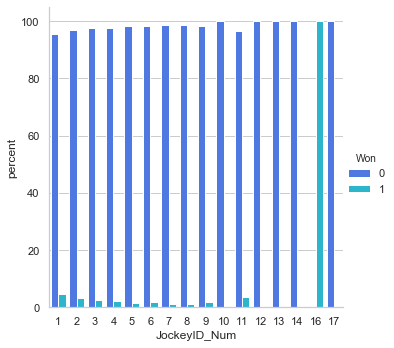

In [109]:
x,y = 'JockeyID_Num', 'Won'
plt.figure(figsize=(10,8))
(df_con
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sb.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
plt.show()

In [116]:
df_con.groupby('JockeyID_Num')['Won'].value_counts(normalize=True)

JockeyID_Num  Won
1             0      0.953967
              1      0.046033
2             0      0.967632
              1      0.032368
3             0      0.974217
              1      0.025783
4             0      0.976536
              1      0.023464
5             0      0.983402
              1      0.016598
6             0      0.981670
              1      0.018330
7             0      0.987261
              1      0.012739
8             0      0.987013
              1      0.012987
9             0      0.980952
              1      0.019048
10            0      1.000000
11            0      0.964286
              1      0.035714
12            0      1.000000
13            0      1.000000
14            0      1.000000
16            1      1.000000
17            0      1.000000
Name: Won, dtype: float64

## Approach-II: Removing all missing value observastions

In [106]:
dnull=df.isnull().sum()/len(df)*100
dnull=dnull.sort_values(ascending=False)
dnull

Hood                  100.000000
EyeShield             100.000000
Eyecover              100.000000
TongueStrap           100.000000
CheekPieces           100.000000
Visor                  99.815313
OverweightValue        99.712105
AllowanceValue         95.629974
YearBorn               85.985497
StatDistance           80.640430
StatCourseDistance     79.749586
StatCourse             76.012385
Blinkers               71.911241
Handicap               52.725495
StartingPrice          13.063907
LastRunDaysFlat         6.841576
ForecastPrice           4.690513
Going                   1.026644
Weather                 1.026644
Stall                   0.554062
OwnerID                 0.551346
Age                     0.551346
eligibility             0.138515
TrackType               0.138515
RaceType                0.138515
Runners                 0.054320
Colour                  0.013580
Sex                     0.013580
DamID                   0.013580
SireID                  0.013580
DamSireID 

In [107]:
horse=df.drop(dnull.index[dnull.values>50].to_list()+['RaceID','HorseID','ScheduledTime','RaceType'],axis=1)
horse.head(10)

,Cloth,Stall,WeightValue,JockeyID,TrainerID,OwnerID,LastRunDaysFlat,Age,ForecastPrice,StartingPrice,Bred,DamID,SireID,DamSireID,Sex,Colour,MeetingID,RaceNumber,HorseCount,Runners,Going,Weather,Course_Distance,TrackType,eligibility,CourseID,MeetingDate,Won
0,7,5.0,132,1398052.0,1198534,1289143.0,26.0,3.0,16-Jan,12-Jan,SAF,2803520.0,2004880.0,2179351.0,f,b,87048,1,13,11.0,Good,Cloudy,1312,Turf,2YO only,380,02/05/2017,0
1,13,6.0,132,1165412.0,1188128,1140080.0,NaN,3.0,20-Jan,40/1,SAF,2749301.0,2960049.0,2001540.0,f,b,87048,1,13,11.0,Good,Cloudy,1312,Turf,2YO only,380,02/05/2017,0
2,9,7.0,132,1239852.0,1199122,1448576.0,NaN,3.0,10-Jan,NaN,SAF,2761722.0,2441786.0,2123459.0,f,b,87048,1,13,11.0,Good,Cloudy,1312,Turf,2YO only,380,02/05/2017,0
3,1,12.0,132,1417524.0,1049637,1487690.0,33.0,3.0,07-Apr,11-Oct,SAF,2347111.0,2170013.0,2071137.0,f,b,87048,1,13,11.0,Good,Cloudy,1312,Turf,2YO only,380,02/05/2017,1
4,11,8.0,132,1354773.0,1140041,1403676.0,24.0,3.0,08-Jan,NaN,SAF,2618721.0,2410998.0,2170115.0,f,b,87048,1,13,11.0,Good,Cloudy,1312,Turf,2YO only,380,02/05/2017,0
5,2,3.0,132,1362975.0,1188086,1288704.0,NaN,3.0,16-Jan,28-Jan,SAF,2618903.0,2320735.0,2352644.0,f,b,87048,1,13,11.0,Good,Cloudy,1312,Turf,2YO only,380,02/05/2017,0
6,12,9.0,132,1140054.0,1198584,1490708.0,NaN,3.0,20-Jan,33/1,SAF,2718050.0,2950716.0,2170153.0,f,b,87048,1,13,11.0,Good,Cloudy,1312,Turf,2YO only,380,02/05/2017,0
7,10,1.0,132,1389064.0,1143892,1439626.0,NaN,3.0,16-Jan,50/1,SAF,2884990.0,2908964.0,2170068.0,f,b,87048,1,13,11.0,Good,Cloudy,1312,Turf,2YO only,380,02/05/2017,0
8,3,13.0,132,1418973.0,1165844,1167965.0,NaN,3.0,14-Jan,16-Jan,SAF,2619919.0,2231546.0,2172473.0,f,ch,87048,1,13,11.0,Good,Cloudy,1312,Turf,2YO only,380,02/05/2017,0
9,4,11.0,132,1138258.0,1140038,1143873.0,45.0,3.0,03-Jan,11-Aug,SAF,2814419.0,2327160.0,2198389.0,f,b,87048,1,13,11.0,Good,Cloudy,1312,Turf,2YO only,380,02/05/2017,0


In [108]:
horse['StartingPrice'].str.contains('/1').sum()

6391

In [109]:
horse.isnull().sum()

Cloth                 0
Stall               204
WeightValue           0
JockeyID              1
TrainerID             0
OwnerID             203
LastRunDaysFlat    2519
Age                 203
ForecastPrice      1727
StartingPrice      4810
Bred                  0
DamID                 5
SireID                5
DamSireID             5
Sex                   5
Colour                5
MeetingID             0
RaceNumber            0
HorseCount            0
Runners              20
Going               378
Weather             378
Course_Distance       0
TrackType            51
eligibility          51
CourseID              0
MeetingDate           0
Won                   0
dtype: int64

In [110]:
print('dimmensions after removing features >50% missing values:',horse.shape)
print('class %:','\n',df.Won.value_counts(normalize=True))
print('class counts:','\n',horse.Won.value_counts())

dimmensions after removing features >50% missing values: (36819, 28)
class %: 
 0    0.921046
1    0.078954
Name: Won, dtype: float64
class counts: 
 0    33912
1     2907
Name: Won, dtype: int64


In [111]:
horse.dropna(axis=0,inplace=True)
print('dimmensions after removing missing value observations:',horse.shape)
print('class %:','\n',horse.Won.value_counts(normalize=True))
print('class counts:','\n',horse.Won.value_counts())

dimmensions after removing missing value observations: (29404, 28)
class %: 
 0    0.907019
1    0.092981
Name: Won, dtype: float64
class counts: 
 0    26670
1     2734
Name: Won, dtype: int64


In [136]:
horse.head(50)

,Cloth,Stall,WeightValue,JockeyID,TrainerID,OwnerID,LastRunDaysFlat,Age,ForecastPrice,StartingPrice,Bred,DamID,SireID,DamSireID,Sex,Colour,MeetingID,RaceNumber,HorseCount,Runners,Going,Weather,Course_Distance,TrackType,eligibility,CourseID,MeetingDate,Won
0,7,5.0,132,1398052.0,1198534,1289143.0,26.0,3.0,16-Jan,12-Jan,SAF,2803520.0,2004880.0,2179351.0,f,b,87048,1,13,11.0,Good,Cloudy,1312,Turf,2YO only,380,02/05/2017,0
3,1,12.0,132,1417524.0,1049637,1487690.0,33.0,3.0,07-Apr,11-Oct,SAF,2347111.0,2170013.0,2071137.0,f,b,87048,1,13,11.0,Good,Cloudy,1312,Turf,2YO only,380,02/05/2017,1
9,4,11.0,132,1138258.0,1140038,1143873.0,45.0,3.0,03-Jan,11-Aug,SAF,2814419.0,2327160.0,2198389.0,f,b,87048,1,13,11.0,Good,Cloudy,1312,Turf,2YO only,380,02/05/2017,0
11,5,2.0,132,1414585.0,1188128,1385595.0,24.0,3.0,10-Jan,100/1,SAF,2765587.0,2268827.0,2001595.0,f,ch,87048,1,13,11.0,Good,Cloudy,1312,Turf,2YO only,380,02/05/2017,0
13,6,3.0,132,1370809.0,1188086,1375331.0,152.0,4.0,25-Jan,100/1,SAF,2888286.0,2712483.0,2420665.0,g,ch,87048,2,13,13.0,Good,Cloudy,1312,Turf,3YO plus,380,02/05/2017,0
15,1,12.0,132,1418973.0,1165844,1167965.0,12.0,4.0,08-Jan,17-Feb,SAF,2708755.0,2754944.0,2317711.0,c,b,87048,2,13,13.0,Good,Cloudy,1312,Turf,3YO plus,380,02/05/2017,0
16,5,7.0,132,1384815.0,1289156,1288412.0,12.0,5.0,13-Feb,28-Jan,SAF,2668811.0,2001615.0,2170054.0,g,ch,87048,2,13,13.0,Good,Cloudy,1312,Turf,3YO plus,380,02/05/2017,0
17,3,9.0,132,1140012.0,1198584,1422932.0,89.0,4.0,14-Jan,33/1,SAF,2619596.0,2440879.0,2274314.0,g,b,87048,2,13,13.0,Good,Cloudy,1312,Turf,3YO plus,380,02/05/2017,0
18,8,13.0,132,1200677.0,1165857,1167981.0,12.0,4.0,16-Jan,66/1,SAF,2811741.0,2440879.0,2021423.0,g,b,87048,2,13,13.0,Good,Cloudy,1312,Turf,3YO plus,380,02/05/2017,0
19,13,2.0,126,1414585.0,1240064,1188078.0,28.0,3.0,16-Jan,100/1,SAF,2967946.0,2853419.0,2064086.0,g,b,87048,2,13,13.0,Good,Cloudy,1312,Turf,3YO plus,380,02/05/2017,0


In [114]:
horse.StartingPrice[horse.StartingPrice.str.contains('/1')]=horse.StartingPrice.mode()[0]

In [113]:
horse.ForecastPrice[horse.ForecastPrice.str.contains('/1')]=horse.ForecastPrice.mode()[0]

In [115]:
horse.head()

,Cloth,Stall,WeightValue,JockeyID,TrainerID,OwnerID,LastRunDaysFlat,Age,ForecastPrice,StartingPrice,Bred,DamID,SireID,DamSireID,Sex,Colour,MeetingID,RaceNumber,HorseCount,Runners,Going,Weather,Course_Distance,TrackType,eligibility,CourseID,MeetingDate,Won
0,7,5.0,132,1398052.0,1198534,1289143.0,26.0,3.0,16-Jan,12-Jan,SAF,2803520.0,2004880.0,2179351.0,f,b,87048,1,13,11.0,Good,Cloudy,1312,Turf,2YO only,380,02/05/2017,0
3,1,12.0,132,1417524.0,1049637,1487690.0,33.0,3.0,07-Apr,11-Oct,SAF,2347111.0,2170013.0,2071137.0,f,b,87048,1,13,11.0,Good,Cloudy,1312,Turf,2YO only,380,02/05/2017,1
9,4,11.0,132,1138258.0,1140038,1143873.0,45.0,3.0,03-Jan,11-Aug,SAF,2814419.0,2327160.0,2198389.0,f,b,87048,1,13,11.0,Good,Cloudy,1312,Turf,2YO only,380,02/05/2017,0
11,5,2.0,132,1414585.0,1188128,1385595.0,24.0,3.0,10-Jan,14-Jan,SAF,2765587.0,2268827.0,2001595.0,f,ch,87048,1,13,11.0,Good,Cloudy,1312,Turf,2YO only,380,02/05/2017,0
13,6,3.0,132,1370809.0,1188086,1375331.0,152.0,4.0,25-Jan,14-Jan,SAF,2888286.0,2712483.0,2420665.0,g,ch,87048,2,13,13.0,Good,Cloudy,1312,Turf,3YO plus,380,02/05/2017,0


In [117]:
horse.shape

(29404, 28)

In [118]:
horse.to_csv('Horses_Approach2_1.csv',index=False)

In [120]:
# del horse_final
from sklearn.preprocessing import LabelEncoder
to_dummies=['Bred','Sex','Colour','TrackType','Weather','Going','eligibility']
horse_dummies=pd.get_dummies(horse[to_dummies],drop_first=True)
horse_final=pd.concat([horse.drop(to_dummies,axis=1),horse_dummies],axis=1)

le_foreprice=LabelEncoder()
le_startprice=LabelEncoder()
le_meetdate=LabelEncoder()
le_meetid=LabelEncoder()

horse_final.ForecastPrice=le_foreprice.fit_transform(horse_final.ForecastPrice)
horse_final.StartingPrice=le_startprice.fit_transform(horse_final.StartingPrice)
horse_final.MeetingDate=le_meetdate.fit_transform(horse_final.MeetingDate)
horse_final.MeetingID=le_meetid.fit_transform(horse_final.MeetingID)


In [122]:
horse_final.head()
horse_final.to_csv('Horses_Approach2_2.csv',index=False)

In [129]:
# from sklearn.preprocessing import LabelEncoder

# le_bred=LabelEncoder()
# le_sex=LabelEncoder()
# le_color=LabelEncoder()
# le_going=LabelEncoder()
# le_track=LabelEncoder()
# le_weather=LabelEncoder()

# le_foreprice=LabelEncoder()
# le_startprice=LabelEncoder()
# le_going=LabelEncoder()
# le_elig=LabelEncoder()
# le_meetdate=LabelEncoder()

# horse.Bred=le_bred.fit_transform(horse.Bred)
# horse.Sex=le_sex.fit_transform(horse.Sex)
# horse.Colour=le_color.fit_transform(horse.Colour)
# horse.TrackType=le_going.fit_transform(horse.TrackType)
# horse.Weather=le_weather.fit_transform(horse.Weather)

# horse.ForecastPrice=le_foreprice.fit_transform(horse.ForecastPrice)
# horse.StartingPrice=le_startprice.fit_transform(horse.StartingPrice)
# horse.Going=le_going.fit_transform(horse.Going)
# horse.eligibility=le_elig.fit_transform(horse.eligibility)
# horse.MeetingDate=le_meetdate.fit_transform(horse.MeetingDate)


In [163]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train,x_test,y_train,y_test=train_test_split(horse_final.drop(['Won'],axis=1),horse.Won,
                                               test_size=0.25,stratify=horse_final.Won,random_state=100)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [164]:
print('dimmensions of train data:',x_train.shape,'\n','*'*70)
print('class %:','\n',y_train.value_counts(normalize=True)*100,'\n')
print('class counts:','\n',y_train.value_counts())

print('\n','*'*70,'\n','dimmensions of test data:',x_test.shape,'\n','*'*70)
print('class %:','\n',y_test.value_counts(normalize=True)*100,'\n')
print('class counts:','\n',y_test.value_counts())

dimmensions of train data: (22053, 64) 
 **********************************************************************
class %: 
 0    90.699678
1     9.300322
Name: Won, dtype: float64 

class counts: 
 0    20002
1     2051
Name: Won, dtype: int64

 ********************************************************************** 
 dimmensions of test data: (7351, 64) 
 **********************************************************************
class %: 
 0    90.708747
1     9.291253
Name: Won, dtype: float64 

class counts: 
 0    6668
1     683
Name: Won, dtype: int64


In [165]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score,StratifiedKFold,KFold
from sklearn.metrics import accuracy_score, roc_auc_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report

In [166]:
def model_metrics(model,x_test,y_test):
    y_pred=model.predict(x_test)
    y_proba=model.predict_proba(x_test)
    print('confusion matrix:\n',confusion_matrix(y_test,y_pred))
    tn, fp, fn, tp=confusion_matrix(y_test,y_pred).ravel()
    print('tn: ',tn,'\t','fp: ',fp)
    print('fn: ',fn,'\t','tp: ',tp)
    print('\nAccuracy: ',accuracy_score(y_test,y_pred).round(3))
    print('f1_score: ', f1_score(y_test,y_pred,average=None).round(3))
    print('recall: ', recall_score(y_test,y_pred,average=None).round(3))
    print('precision: ', precision_score(y_test,y_pred,average=None).round(3))
    print('auc_score: ', roc_auc_score(y_test,y_proba[:,1]).round(3))
    print('\n')
    print(classification_report(y_test,y_pred,labels=[0,1]))

In [176]:
def model_CVmetrics(model,x_train,y_train):
    scv=StratifiedKFold(n_splits=5,random_state=100)
    kcv=KFold(n_splits=5, random_state=100)
    metrics=['accuracy','f1','recall','precision','roc_auc']
    dfMet=pd.DataFrame()
    dfMet['Stratified_10Fold']=[cross_val_score(model,X=x_train,y=y_train,cv=scv,scoring=met).mean().round(3) for met in metrics]
    dfMet['10Fold']=[cross_val_score(model,X=x_train,y=y_train,cv=kcv,scoring=met).mean().round(3) for met in metrics]
    dfMet.index=metrics
    print(dfMet)

In [168]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


#### Approach II -Predictive Modelling

In [173]:
#DECISION TREE
scv=StratifiedKFold(n_splits=10)
parms={'criterion':['gini','entropy'],
       'max_depth': np.arange(3,15)}
dct_gscv=GridSearchCV(DecisionTreeClassifier(class_weight='balanced'),parms,cv=scv,scoring='f1').fit(x_train,y_train)
dct_gscv.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [174]:
dct_gscv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=3, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

In [175]:
dct=DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=3, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')
dct.fit(x_train,y_train)
model_metrics(dct,x_test,y_test)

confusion matrix:
 [[4371 2297]
 [ 207  476]]
tn:  4371 	 fp:  2297
fn:  207 	 tp:  476

Accuracy:  0.659
f1_score:  [0.777 0.275]
recall:  [0.656 0.697]
precision:  [0.955 0.172]
auc_score:  0.717


              precision    recall  f1-score   support

           0       0.95      0.66      0.78      6668
           1       0.17      0.70      0.28       683

    accuracy                           0.66      7351
   macro avg       0.56      0.68      0.53      7351
weighted avg       0.88      0.66      0.73      7351



In [177]:
model_CVmetrics(dct,x_train,y_train)

           Stratified_10Fold  10Fold
accuracy               0.664   0.665
f1                     0.274   0.275
recall                 0.679   0.682
precision              0.173   0.173
roc_auc                0.727   0.729


In [ ]:
#RANDOM FORESTS
rf_params={'n_estimators': [100,300,500],'max_features': ['auto', 'sqrt', 'log2'],
                    'max_depth' : [3,4,5,6,7,8],'criterion' :['gini', 'entropy']}
rf_gscv=GridSearchCV(RandomForestClassifier(class_weight='balanced',random_state=100),rf_params,cv=scv).fit(x_train,y_train)

In [ ]:
rf_gscv.best_estimator_

### SVM